In [72]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Dense, Dropout, Flatten
from keras.preprocessing import image

from keras.models import load_model
import numpy as np
import cv2
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Configure the ImageDataGenerator for the training & testing set with augmentations

In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Rescale pixel values (0-255) to (0-1)
    shear_range=0.2,         # Apply shear transformation
    zoom_range=0.2,          # Apply zoom transformation
    horizontal_flip=True,    # Randomly flip images horizontally
    vertical_flip=False
)
test_datagen = ImageDataGenerator(rescale=1./255)


### Loading Images

In [4]:
train_generator = train_datagen.flow_from_directory(
    'Dataset/training_set',
    target_size=(64,64),
    batch_size=128,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    'Dataset/test_set',
    target_size=(64,64),
    batch_size=128,
    class_mode='categorical'
)

Found 15750 images belonging to 9 classes.
Found 2250 images belonging to 9 classes.


In [5]:
print("Len x-train : ", len(train_generator))
print("Len x-test : ", len(test_generator))

Len x-train :  124
Len x-test :  18


In [6]:
# The Class Indices in Training Dataset
train_generator.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

### Model Initializing and adding layers


In [73]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(9, activation='softmax'))


### compling the model

In [86]:
optimizer = Adam(learning_rate=0.0001)  # Lower learning rate
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


### visualization

In [87]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 684,361 (2.61 MB)

 Trainable params: 684,361 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

### Training the Model 

In [88]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)


Epoch 1/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 89s 681ms/step - accuracy: 0.5330 - loss: 1.5709 - val_accuracy: 0.9236 - val_loss: 0.2684
Epoch 2/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 75s 600ms/step - accuracy: 0.9380 - loss: 0.2158 - val_accuracy: 0.9636 - val_loss: 0.1724
Epoch 3/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 73s 587ms/step - accuracy: 0.9727 - loss: 0.0966 - val_accuracy: 0.9693 - val_loss: 0.1197
Epoch 4/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 76s 608ms/step - accuracy: 0.9828 - loss: 0.0582 - val_accuracy: 0.9751 - val_loss: 0.1098
Epoch 5/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 72s 583ms/step - accuracy: 0.9909 - loss: 0.0348 - val_accuracy: 0.9778 - val_loss: 0.1084
Epoch 6/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 73s 590ms/step - accuracy: 0.9940 - loss: 0.0249 - val_accuracy: 0.9804 - val_loss: 0.0941
Epoch 7/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 72s 582ms/step - accuracy: 0.9955 - loss: 0.0173 - val_accuracy: 0.9764 - val_loss: 0.1248
Epoch 8/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 73s 590ms/step - accuracy: 0.9958 - loss: 0

In [89]:
val_loss, val_accuracy = model.evaluate(train_generator)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

124/124 ━━━━━━━━━━━━━━━━━━━━ 74s 597ms/step - accuracy: 0.9986 - loss: 0.0066
Validation Loss: 0.0061272624880075455, Validation Accuracy: 0.9987936615943909


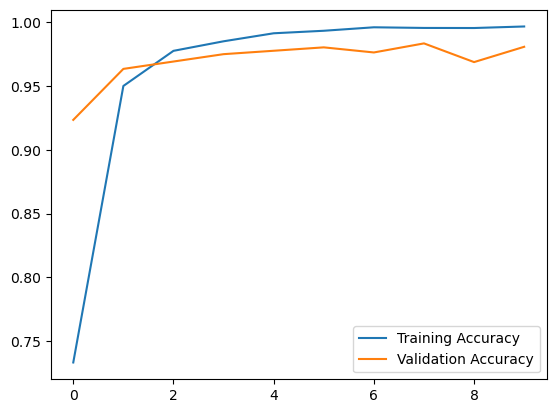

In [90]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [91]:
# Evaluate model on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc:.2f}')


18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 403ms/step - accuracy: 0.9774 - loss: 0.0946
Test Accuracy: 0.98


### saving the model

In [92]:
model.save("SLDmodel.h5")

### loading the saved model

In [93]:
model=load_model("SLDmodel.h5")

### Testing the model

In [94]:
from skimage.transform import resize
def detect(frame):
    img = image.img_to_array(frame)  
    img = resize(img, (64, 64))  
    img = np.expand_dims(img, axis=0) 
    
    # Normalize if the pixel values are greater than 1 (for model compatibility)
    if np.max(img) > 1:
        img = img / 255.0
    
    # Make prediction
    pred = np.argmax(model.predict(img), axis=1)
    
    # Define the output labels
    op = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
    
    # Print the predicted letter
    print("The predicted letter is ", op[pred[0]])
    print(f"Shape of a single image: {img.shape}")

In [97]:
frame = cv2.imread(r"C:\Users\VENU\Desktop\MAJOR PROJECT\RTCS(Github)\Dataset\test_set\G\1.png")
if frame is None:
    print("Error loading image!")
else:
    data = detect(frame)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
The predicted letter is  G
Shape of a single image: (1, 64, 64, 3)


In [98]:
t1=cv2.imread(r"C:\Users\VENU\Desktop\MAJOR PROJECT\RTCS(Github)\Dataset\test_set\G\9.png")
data=detect(t1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
The predicted letter is  G
Shape of a single image: (1, 64, 64, 3)


In [99]:
t2=cv2.imread(r"C:\Users\VENU\Desktop\MAJOR PROJECT\RTCS(Github)\Dataset\test_set\A\9.png")
data=detect(t2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
The predicted letter is  A
Shape of a single image: (1, 64, 64, 3)


In [100]:
t3=cv2.imread(r"C:\Users\VENU\Desktop\MAJOR PROJECT\RTCS(Github)\Dataset\test_set\A\1.png")
data=detect(t3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
The predicted letter is  A
Shape of a single image: (1, 64, 64, 3)


In [101]:
t4=cv2.imread(r"C:\Users\VENU\Desktop\MAJOR PROJECT\RTCS(Github)\Dataset\test_set\C\1.png")
data=detect(t4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
The predicted letter is  C
Shape of a single image: (1, 64, 64, 3)


In [102]:
t5=cv2.imread(r"C:\Users\VENU\Desktop\MAJOR PROJECT\RTCS(Github)\Dataset\test_set\I\200.png")
data=detect(t5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
The predicted letter is  I
Shape of a single image: (1, 64, 64, 3)


In [103]:
t6=cv2.imread(r"C:\Users\VENU\Desktop\MAJOR PROJECT\RTCS(Github)\Dataset\test_set\B\58.png")
data=detect(t6)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
The predicted letter is  B
Shape of a single image: (1, 64, 64, 3)


In [33]:
t7=cv2.imread(r"C:\Users\VENU\Desktop\MAJOR PROJECT\RTCS(Github)\Dataset\test_set\E\78.png")
data=detect(t7)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
The predicted letter is  E
Shape of a single image: (1, 64, 64, 3)


In [34]:
t8=cv2.imread(r"C:\Users\VENU\Desktop\MAJOR PROJECT\RTCS(Github)\Dataset\test_set\B\250.png")
data=detect(t8)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
The predicted letter is  B
Shape of a single image: (1, 64, 64, 3)


In [54]:
t9=cv2.imread(r"C:\Users\VENU\Desktop\MAJOR PROJECT\RTCS(Github)\Dataset\test_set\F\200.png")
data=detect(t9)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
The predicted letter is  F
Shape of a single image: (1, 64, 64, 3)
